In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
titanic_data= pd.read_csv('titanic_train.csv')

In [45]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


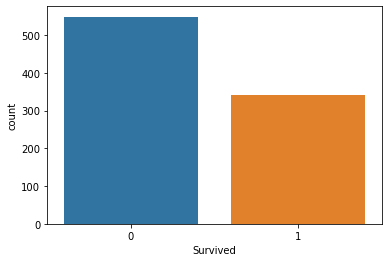

In [46]:
sns.countplot(x='Survived',data=titanic_data)

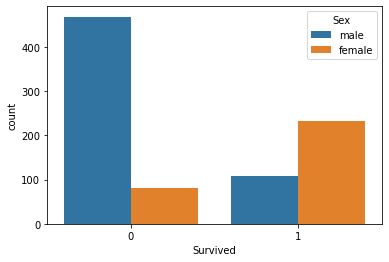

In [47]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

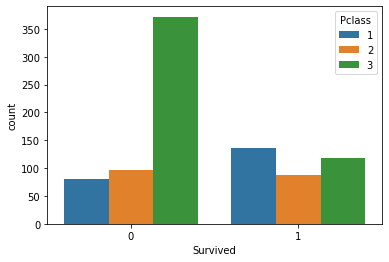

In [48]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

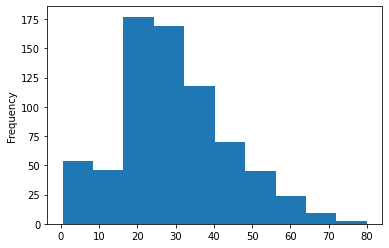

In [49]:
titanic_data['Age'].plot.hist()

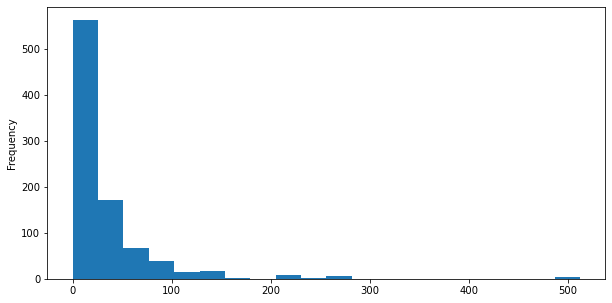

In [50]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))
#bins->for width of each plot of histogram
#figsize->makes the picture to that size

In [51]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


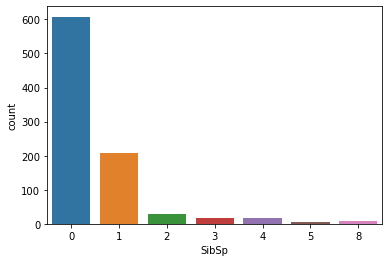

In [52]:
sns.countplot(x='SibSp',data=titanic_data)

# Data Wrangling

In [53]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

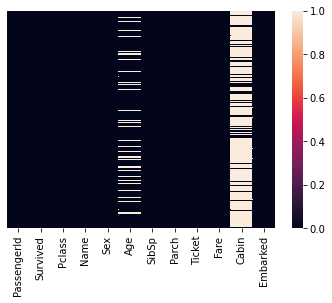

In [54]:
sns.heatmap(titanic_data.isnull(),yticklabels=False)

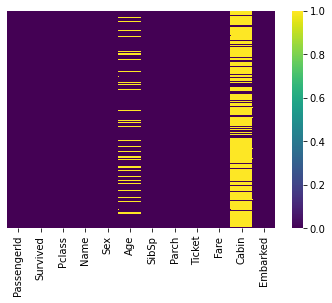

In [55]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cmap='viridis')

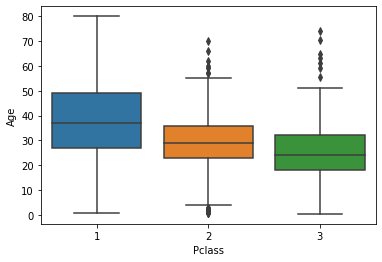

In [56]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data)

In [57]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
#titanic_data.drop(['PassengerId','Name','Sex','Embarked','Pclass','Ticket','Cabin'],axis=1,inplace=True)

In [61]:
titanic_data=titanic_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [62]:
titanic_data.shape

(891, 8)

In [63]:
titanic_data=titanic_data.dropna(subset =['Age','Embarked'])

In [64]:
titanic_data.shape

(712, 8)

In [65]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
titanic_data.iloc[:,2]=le.fit_transform(titanic.iloc[:,2].values)
titanic_data.iloc[:,7]=le.fit_transform(titanic.iloc[:,7].values)

In [66]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Train & Test Data

In [67]:
X=titanic_data.drop('Survived',axis=1) #X->independent variable
y=titanic_data['Survived'] #y->dependent variable

In [120]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [121]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [122]:

predictions=logmodel.predict(X_test)

# Accuracy Checking

In [123]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,predictions))

0.4585633803868073

In [124]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.89      0.84       130\n           1       0.79      0.63      0.70        84\n\n    accuracy                           0.79       214\n   macro avg       0.79      0.76      0.77       214\nweighted avg       0.79      0.79      0.78       214\n'

In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions) 

array([[116,  14],
       [ 31,  53]])

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7897196261682243